<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/%5BGraduate%5D_(feature_extraction)_02_ResNet_152_FeatureExtractor_Exp_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.ME
* From <code> Nope</code>
* Add CNN-based Clasifier...!!
* LEGO~


✅ Check Point<br>
> 1. Malimg Classification using ResNet-152
> 2. Build ResNet-152 Feature Extractor
> 3. Train it!

<br>

<code>::start:: 20.11.17. Tue pm 5:20 ~ </code><br>
<code>::Continue:: ~</code><br>
<code>::Add:</code><br>

* Need to save parameters -> Best Ressut
    * Reference: <a ref="https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html">PyTorch_Doc_ Transfer Learning</a>

In [1]:
"""
Can Do so many things... like,

1) Just Train CNN to our 3-channel Data
2) User pre-trained ResNet-VAE Encoder to Classifiy Malware Families
3) Extend Our Research to more...!

++++++++++++++++++++++  Up Date  +++++++++++++++++++++++++++++
4) Train many model as possible
5) Save Model's dict to post Exp
6) In Post Exp, we'll ensemble features and Build Ensemble model

"""

"\nCan Do so many things... like,\n\n1) Just Train CNN to our 3-channel Data\n2) User pre-trained ResNet-VAE Encoder to Classifiy Malware Families\n3) Extend Our Research to more...!\n\n++++++++++++++++++++++  Up Date  +++++++++++++++++++++++++++++\n4) Train many model as possible\n5) Save Model's dict to post Exp\n6) In Post Exp, we'll ensemble features and Build Ensemble model\n\n"

---
< Questions ><br>
Q1. Do you have Key-Papers?
<br>Image-based malware classification using ensemble of CNN architectures (IMCEC)</br>
https://www.sciencedirect.com/science/article/pii/S016740482030033X


---

*  Reference: 
    * <a ref = "https://pytorch.org/docs/stable/torchvision/models.html#wide-resnet">Pytorch pre-trained model</a>
    * <a ref = "https://www.programcreek.com/python/example/108010/torchvision.models.resnet152">How to implemnt transfer learning</a>
    * <a ref="https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html">Transfer Learning Tutorial, Save Best Model</a>

## Mount Drive

In [2]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%cd drive/My\ Drive/Post_InfoSec_Exps/ResNet-VAE/ResNetVAE-master.zip (Unzipped Files)/ResNetVAE-master
# ! ls

/content/drive/My Drive/Post_InfoSec_Exps/ResNet-VAE/ResNetVAE-master.zip (Unzipped Files)/ResNetVAE-master


## 01. Import Library

In [5]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

# save single numpy array
from tempfile import TemporaryFile
from sklearn.manifold import TSNE

import torch
import torch.utils.data  # torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import torchvision 
from torchvision import datasets, transforms
from torchvision.utils import save_image

# load modules
from torchvision import models
from modules import *

## 02. Data Preparation

* Make Custom Dataset
* Make Custom DataLoader
* 📌 edit Train_Val_Test Split
    * From <code>Train_Test Split</code> => <code>Train_Val_Test Split</code> 

### 📍 < Notice ><br>
* ResNet-VAE 모델을 훈련시킬 때는 데이터셋을 train, test만 준비한다.(Validation set 없이!)<br>
이는 일반적인 VAE Model Tutorial의 학습방식을 따른다. <code>-20.09.08.Tue. pm3:00-</code>
---

데이터 전처리

In [6]:
transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),  # make 3-channel
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  # Composes several transforms together.

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../../../../InformationSecurity_Summer/malimg',
                                            transform=transforms)

In [7]:
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

Split Train Data to Train, Test dataset

In [8]:
full_dataset = trainset

train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

print('print train_size, val_size, test_size: ', train_size, val_size, test_size)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])  # Randomly split a dataset into non-overlapping new datasets of given lengths. Optionally fix the generator for reproducible results, e.g.:
print('print train_dataset, val_dataset, test_dataset: ', len(train_dataset), len(val_dataset), len(test_dataset))

print train_size, val_size, test_size:  7471 933 935
print train_dataset, val_dataset, test_dataset:  7471 933 935


In [9]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=16,  # 16 to args.batch_size
                                           shuffle=True,
                                           pin_memory=True)
valid_loader = torch.utils.data.DataLoader(val_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           pin_memory=True)  # (i.e., setting pin_memory=True)
                                                             #  which enables fast data transfer to CUDA-enabled GPUs
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           pin_memory=True) 

3-channel Image를 출력하기 위해 print_loader라는 오브젝트도 하나 만들어보자

In [10]:
# For 3-channel Image print
print_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=4,
                                           shuffle=True,
                                           pin_memory=True)

3-channel Image 출

In [11]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [12]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([ 4, 22, 11,  3,  2,  5,  3,  2,  2, 18,  3,  2, 24, 24,  6, 24])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 3, 224, 224])
torch.Size([3, 454, 1810])
Alueron.gen!J VB.AT Instantaccess Allaple.L Allaple.A Autorun.K Allaple.L Allaple.A Allaple.A Rbot!gen Allaple.L Allaple.A Yuner.A Yuner.A C2LOP.P Yuner.A 


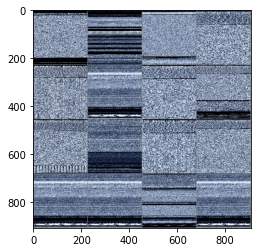

In [13]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

8개의 3-channel Image를 출력해보자

In [14]:
# For 3-channel Image print

print_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=8,
                                           shuffle=True,
                                           pin_memory=True)

In [15]:
dataiter = iter(print_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels)

torch.Size([8, 3, 224, 224])
tensor([ 2,  2,  2,  2,  2,  2,  2, 24])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 454, 906)
(454, 906, 3)
torch.Size([3, 228, 1810])
Allaple.A Allaple.A Allaple.A Allaple.A Allaple.A Allaple.A Allaple.A Yuner.A 


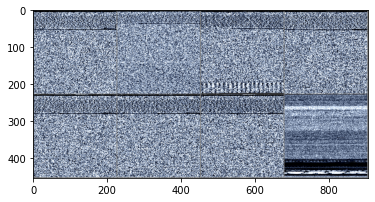

In [16]:
imshow(torchvision.utils.make_grid(images, nrow=4))
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(8)))

## 03. Model Architecture
* <code>pre-trained ResNet-152</code>
* <code>Transfer Learning</code>
* <code>Fine-Tunning</code>

### Feature Extranctor
이번 구현의 목적은 Feature Extractor이다<br>
pre-trained model의 마지막 레이어만 학습해보도록 하자!(코드를 보면 이해가 쉬울 것이다)

In [11]:
# Reference: https://www.programcreek.com/python/example/108010/torchvision.models.resnet152

def get_pretrained_resnet(new_fc_dim=None):
    """
    Reference: https://tutorials.pytorch.kr/beginner/transfer_learning_tutorial.html

    이제, 마지막 계층을 제외한 신경망의 모든 부분을 고정해야 합니다. 
    requires_grad == False 로 설정하여
    매개변수를 고정하여 backward() 중에 경사도가 계산되지 않도록 해야합니다
    """
    
    # load pretrained_resnet152
    resnet152 = models.resnet152(pretrained=True)
    
    # Set requires_grad == False
    for param in resnet152.parameters():
        param.requires_grad = False

    # 새로 생성된 모듈의 매개변수는 기본값으로 requires_grad = True가 된다
    num_ftrs = resnet152.fc.in_features   # in_feature is the number of inputs for your linear layer:
                                         

    if new_fc_dim is not None:  # 마지막 계층의 유닛 개수를 변경해준다.
                                # For Classification        
        resnet152.fc = nn.Linear(num_ftrs, new_fc_dim)

        # _init_fc(resnet152.fc)
    else:
        pass
        # resnet152.fc = lambda x:x

    return resnet152

In [12]:
resnet152 = get_pretrained_resnet(25)  # load pre-trained ResNet152
resnet152

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

모델을 cuda 디바이스에 올려준다.

In [13]:
resnet152 = resnet152.to(device = ('cuda:0' if torch.cuda.is_available() else 'cpu'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet152.parameters(), lr=0.001)  # Adam Optimizer를 사용하고 Learning rate는 0.001로한다.

In [20]:
dataiter = iter(print_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels)

torch.Size([8, 3, 224, 224])
tensor([ 2, 24,  3,  2, 24, 24, 24, 24])


## Model Test해보기
* 모델 학습을 마치고 모델이 잘 학습됬는지 확인할 때 사용

In [ ]:
# test output [ 0,  5,  9,  8, 12,  9,  0, 13]
with torch.no_grad():
    images = images.cuda()
    labels = labels.cuda()

    outputs = resnet152(images)
    print("outputs.shape: ", outputs.shape)
    print("Sum_outputs: ", outputs.sum())
    # print(outputs)


    _, predicted = torch.max(outputs.data, 1)  # return: values, indices
    print(_)
    print("print_predict: ", predicted)

print("print_answers: ", labels)


outputs.shape:  torch.Size([7, 25])
Sum_outputs:  tensor(-56799.8516, device='cuda:0')
tensor([320.7472, 469.0329, 484.6823, 302.2632, 711.0311, 653.0077, 297.3896],
       device='cuda:0')
print_predict:  tensor([ 8,  3,  3,  2, 14, 17, 20], device='cuda:0')
print_answers:  tensor([ 1,  3,  3,  2, 14, 17, 20], device='cuda:0')


* Change
    * 기존 함수 코드에서 실행 코드로 변경해보자...!

In [14]:
import argparse

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")

args.net = resnet152
args.criterion = criterion
args.optim = optimizer

args.train_loader = train_loader
args.val_loader = valid_loader
args.test_loader = test_loader

# args.n_layer = 5
# args.in_dim = 3072
# args.out_dim = 10
# args.hid_dim = 100
# args.act = 'relu'

args.lr = 0.001  ## 우선 learning rate를 작게 가져가보도록 하자
args.mm = 0.9
args.epoch = 100


print(args)

Namespace(criterion=CrossEntropyLoss(), epoch=100, lr=0.001, mm=0.9, net=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample):

<code>save_model_path</code>를 잘 정해주자! -20.11.16.Tue-

## 04. Train, Validate, Test and Experiment
* 함수화 필요 - 20.11.17.Tue-

In [16]:
"""
===== Update =====
* 이번에는 best_model_wts를 저장해줄거야!
** model_dict과 optimizer_dict을 저장!

*** list_ 값들도 저장해주면 나중에 결과 리포팅 하기에 좋지!
"""

## Reference: https://github.com/Steve-YJ/Exp-Standalone-DeepLearning/blob/master/%5BPractice%5D_Cifar10.ipynb
save_model_path = './graduate_resnet152_feature_extractor'

net = args.net  # resnet152
# criterion = criterion
# optimizer = optimizer

list_epoch = []
list_train_loss = []
list_val_loss = []

list_train_acc = []
list_val_acc = []
list_test_acc = []
list_acc_epoch = []

# save best_model_wts
# 잠시 보류
# best_model_wts = copy.deepcopy(net.state_dict())
# best_optim = copy.deepcopy(args.optim.state_dict())
# test_acc = 0.0

for epoch in range(args.epoch):  # loop over the dataset multiple itmes

    # ===== Train ===== #
    net.train()
    optimizer.zero_grad()

    running_loss = 0.0
    train_loss = 0.0

    correct = 0
    total = 0
    for i, data in enumerate(args.train_loader, 0):
        # get the inputs
        inputs, labels = data

        inputs = inputs.cuda()
        labels = labels.cuda()

        # forward + backward + optimize
        outputs = net(inputs)  # input 값의 shape이 맞는지 확인을 했는가? -20.09.16.Wed- am11:10...
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # if i % 100 == 99:  # print every 2000 mini-batches => print every 2 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #             (epoch+1, i+1, running_loss / 100))
        #     running_loss = 0.0

    train_loss = train_loss / len(args.train_loader)
    train_acc = 100 * correct / total
    # append list_values
    list_epoch.append(epoch)
    list_train_loss.append(train_loss)
    list_train_acc.append(train_acc)
    
    # save Pytorch models of best record
        # 10 Epoch마다 저장. 90 Epoch 이후로는 매 Epoch마다 결과 저장

    """
    학습 결과가 가장 좋은 모델의 결과값만 저장할수도 있겠죠?
    여전히 모르겠네...하하
    """
    if epoch % 10 == 0:   
        torch.save(net.state_dict(), os.path.join(save_model_path, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
        torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
        print("Epoch {} model saved!".format(epoch+1))
    elif epoch >= 90: 
        torch.save(net.state_dict(), os.path.join(save_model_path, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
        torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
        print("Epoch {} model saved!".format(epoch+1))

    # ===== Validation ===== #
    net.eval()
    optimizer.zero_grad()

    correct = 0
    total = 0
    val_loss = 0
    with torch.no_grad():
        for data in args.val_loader:
            images, labels = data
            # images = images.view(-1, 3072)

            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            '''
            What this code mean?
            '''
            _, predicted = torch.max(outputs.data, 1)  # return: values, indices
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(args.val_loader)
        val_acc = 100 * correct / total
        list_val_acc.append(val_acc)

        """
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(net.state_dict())
        """

    list_val_loss.append(val_loss)
    print('Epoch {}, Acc(train/val): {:2.2f}/{:2.2f}, Loss(train/val): {:2.2f}/{:2.2f}'.format(epoch+1, train_loss, val_loss, train_acc, val_acc))

    # ===== Evaluation ===== #
    net.eval()
    optimizer.zero_grad()

    correct = 0
    total = 0

    with torch.no_grad():
        for data in args.test_loader:
            images, labels = data
            # images = images.view(-1, 3072)
            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        print('Epoch {}, Test Acc: {}'.format(epoch+1, test_acc))
    list_test_acc.append(test_acc)
    list_acc_epoch.append(epoch)



# save best result
# torch.save(best_model_wts, os.path.join(save_model_path, 'model_epoch{}.pth'.format(best)))      # save motion_encoder
# torch.save(bset_optim, os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(bset)))      # save optimizer

Epoch 1 model saved!
Epoch 1, Acc(train/val): 22.24/44.62, Loss(train/val): 56.77/75.35
Epoch 1, Test Acc: 75.40106951871658
Epoch 2, Acc(train/val): 24.01/55.65, Loss(train/val): 72.73/82.96
Epoch 2, Test Acc: 82.88770053475936
Epoch 3, Acc(train/val): 18.18/40.41, Loss(train/val): 72.84/55.09
Epoch 3, Test Acc: 55.294117647058826
Epoch 4, Acc(train/val): 21.58/38.28, Loss(train/val): 71.53/77.38
Epoch 4, Test Acc: 76.47058823529412
Epoch 5, Acc(train/val): 16.20/23.73, Loss(train/val): 79.99/84.78
Epoch 5, Test Acc: 84.06417112299465
Epoch 6, Acc(train/val): 16.68/12.91, Loss(train/val): 82.45/91.10
Epoch 6, Test Acc: 90.58823529411765
Epoch 7, Acc(train/val): 10.56/71.23, Loss(train/val): 87.70/89.39
Epoch 7, Test Acc: 90.16042780748663
Epoch 8, Acc(train/val): 7.23/49.09, Loss(train/val): 89.55/91.10
Epoch 8, Test Acc: 90.4812834224599
Epoch 9, Acc(train/val): 6.54/21.06, Loss(train/val): 90.00/89.60
Epoch 9, Test Acc: 89.0909090909091
Epoch 10, Acc(train/val): 6.47/26.84, Loss(tra

model train 결과 저장하기(list 값!)

In [17]:
 # save all train test results
import pickle
"""
pickle을 사용해서 dictionary형태로 저장한다.
"""

"""
list_epoch = []
list_train_loss = []
list_val_loss = []

list_train_acc = []
list_val_acc = []
list_test_acc = []
list_acc_epoch = []
"""

# pickle 파일로 저장
# set save_model_path
save_model_path = './graduate_resnet152_feature_extractor/'

results = {'list_epoch': list_epoch,
        'list_train_loss': list_train_loss,
        'list_val_loss': list_val_loss,
        'list_train_acc': list_train_acc,
        'list_val_acc': list_val_acc ,
        'list_test_acc': list_test_acc ,
        'list_acc_epoch': list_acc_epoch}

with open(save_model_path+'resnet152_fe_results', 'wb') as fw:
    pickle.dump(results, fw)
print("Experiment results saved!")

Experiment results saved!


In [18]:
# load data
with open(save_model_path+'resnet152_fe_results', 'rb') as fr:
    results_dict = pickle.load(fr)

# show data
print(results_dict)

{'list_epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'list_train_loss': [22.23937838049654, 24.012230760814738, 18.17799859013903, 21.58471981120845, 16.202675054747065, 16.68238908865589, 10.55762096143298, 7.230048046134295, 6.539478816350511, 6.474405711157902, 3.6567176269989465, 5.320245785191104, 5.590557289337914, 5.442033496684511, 9.888818820523701, 10.510147838933495, 12.461737236105911, 11.195293420480338, 10.371133753221436, 8.450190373126354, 4.96045293872866, 4.847604855551892, 6.525208522191773, 4.326904854878208, 4.581786681941002, 5.335190529266803, 3.6776913512599405, 6.423818264516176, 4.277568908401921, 6.1370126922978

In [19]:
print(results_dict.keys())

dict_keys(['list_epoch', 'list_train_loss', 'list_val_loss', 'list_train_acc', 'list_val_acc', 'list_test_acc', 'list_acc_epoch'])


In [20]:
print(results_dict)

{'list_epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'list_train_loss': [22.23937838049654, 24.012230760814738, 18.17799859013903, 21.58471981120845, 16.202675054747065, 16.68238908865589, 10.55762096143298, 7.230048046134295, 6.539478816350511, 6.474405711157902, 3.6567176269989465, 5.320245785191104, 5.590557289337914, 5.442033496684511, 9.888818820523701, 10.510147838933495, 12.461737236105911, 11.195293420480338, 10.371133753221436, 8.450190373126354, 4.96045293872866, 4.847604855551892, 6.525208522191773, 4.326904854878208, 4.581786681941002, 5.335190529266803, 3.6776913512599405, 6.423818264516176, 4.277568908401921, 6.1370126922978

## Manage Experiment Result
* 실험 결과를 어떻게 관리할 것인가
    * save_exp_result
    * load_exp_result

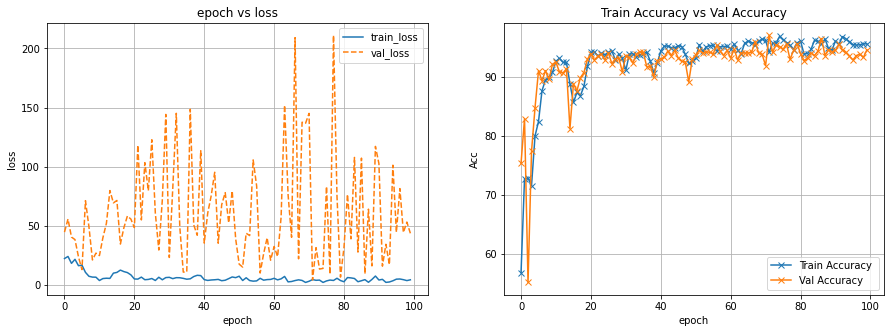

In [21]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(results_dict['list_epoch'], results_dict['list_train_loss'], label='train_loss')
ax1.plot(results_dict['list_epoch'], results_dict['list_val_loss'], '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(results_dict['list_acc_epoch'], results_dict['list_train_acc'], marker='x', label='Train Accuracy ')
ax2.plot(results_dict['list_acc_epoch'], results_dict['list_val_acc'], marker='x', label='Val Accuracy')

ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('Train Accuracy vs Val Accuracy')


plt.savefig(save_model_path + './resnet152_FE.png')
plt.show()


결과 분석<br>
역시 중국의 논문은 걸러야 하나??<br>

* 결과 분석
    * Accuracy만 보면 높은데...
    * train, validation loss가 엉망이다?!
        * trainset에 비해 validationset이 쉽다면 이런 결과가 나온다고 한다...(신기하네...)
        * This may occur if the validation dataset has too few examples as compared to the training dataset
           

dropout layer가 추가된다면 가능하다고 한다.<br>
dropout layer의 기능은 일반화이다. 따라서 training loss는 약간 증가시키고 validation loss는 감소하여 반전 효과(inverted effect)를 줄 수 있다

## 실험 다시 해야한다!
* 1. train_loss 수정: ==> 전체 데이터 개수로 나눠줘야 한다...
* 2. train_acc, val_acc등 추가.

시간이 되면 Standalone-DL 참고해서 Fancy하게 코드를 수정하고 싶다...!

Notice<br>

1 Epoch 학습이 되면 이후 10 Epoch마다 model 및 optimizer 결과값 저장!


# 나는 잘 테니 너는 실험을 해놓아라

* ResNet-finetune

In [ ]:
# Reference: https://www.programcreek.com/python/example/108010/torchvision.models.resnet152

def get_pretrained_resnet(new_fc_dim=None):
    """
    Reference: https://tutorials.pytorch.kr/beginner/transfer_learning_tutorial.html

    이제, 마지막 계층을 제외한 신경망의 모든 부분을 고정해야 합니다. 
    requires_grad == False 로 설정하여
    매개변수를 고정하여 backward() 중에 경사도가 계산되지 않도록 해야합니다
    """
    
    # load pretrained_resnet152
    resnet152 = models.resnet152(pretrained=True)
    
    """
    # Set requires_grad == False
    for param in resnet152.parameters():
        param.requires_grad = False
    """
    # 새로 생성된 모듈의 매개변수는 기본값으로 requires_grad = True가 된다
    num_ftrs = resnet152.fc.in_features   # in_feature is the number of inputs for your linear layer:
                                         

    if new_fc_dim is not None:  # 마지막 계층의 유닛 개수를 변경해준다.
                                # For Classification        
        resnet152.fc = nn.Linear(num_ftrs, new_fc_dim)

        # _init_fc(resnet152.fc)
    else:
        pass
        # resnet152.fc = lambda x:x

    return resnet152

In [ ]:
resnet152 = get_pretrained_resnet(25)
resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet152 = resnet152.to(device = ('cuda:0' if torch.cuda.is_available() else 'cpu'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet152.parameters(), lr=0.001)  # Adam Optimizer를 사용하고 Learning rate는 0.001로한다.

In [ ]:
import argparse

seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

parser = argparse.ArgumentParser()
args = parser.parse_args("")

args.net = resnet152
args.criterion = criterion
args.optim = optimizer

args.train_loader = train_loader
args.val_loader = valid_loader
args.test_loader = test_loader

# args.n_layer = 5
# args.in_dim = 3072
# args.out_dim = 10
# args.hid_dim = 100
# args.act = 'relu'

args.lr = 0.001  ## 우선 learning rate를 작게 가져가보도록 하자
args.mm = 0.9
args.epoch = 100


print(args)

Namespace(criterion=CrossEntropyLoss(), epoch=100, lr=0.001, mm=0.9, net=ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample):

In [ ]:
"""
===== Update =====
* 이번에는 best_model_wts를 저장해줄거야!
** model_dict과 optimizer_dict을 저장!

*** list_ 값들도 저장해주면 나중에 결과 리포팅 하기에 좋지!
"""

## Reference: https://github.com/Steve-YJ/Exp-Standalone-DeepLearning/blob/master/%5BPractice%5D_Cifar10.ipynb
save_model_path = './graduate_resnet152_feature_extractor/fine_tune'

net = args.net  # resnet152
# criterion = criterion
# optimizer = optimizer

list_epoch = []
list_train_loss = []
list_val_loss = []

list_train_acc = []
list_val_acc = []
list_test_acc = []
list_acc_epoch = []

# save best_model_wts
# 잠시 보류
# best_model_wts = copy.deepcopy(net.state_dict())
# best_optim = copy.deepcopy(args.optim.state_dict())
# test_acc = 0.0

for epoch in range(args.epoch):  # loop over the dataset multiple itmes

    # ===== Train ===== #
    net.train()
    optimizer.zero_grad()

    running_loss = 0.0
    train_loss = 0.0

    correct = 0
    total = 0
    for i, data in enumerate(args.train_loader, 0):
        # get the inputs
        inputs, labels = data

        inputs = inputs.cuda()
        labels = labels.cuda()

        # forward + backward + optimize
        outputs = net(inputs)  # input 값의 shape이 맞는지 확인을 했는가? -20.09.16.Wed- am11:10...
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 100 == 99:  # print every 2000 mini-batches => print every 2 mini-batches
            print('[%d, %5d] loss: %.3f' %
                    (epoch+1, i+1, running_loss / 100))
            running_loss = 0.0

    train_loss = train_loss / len(args.train_loader)
    train_acc = 100 * correct / total
    # append list_values
    list_epoch.append(epoch)
    list_train_loss.append(train_loss)
    list_train_acc.append(train_acc)
    
    # save Pytorch models of best record
        # 10 Epoch마다 저장. 90 Epoch 이후로는 매 Epoch마다 결과 저장

    """
    학습 결과가 가장 좋은 모델의 결과값만 저장할수도 있겠죠?
    여전히 모르겠네...하하
    """
    if epoch % 10 == 0:   
        torch.save(net.state_dict(), os.path.join(save_model_path, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
        torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
        print("Epoch {} model saved!".format(epoch))
    elif epoch >= 90: 
        torch.save(net.state_dict(), os.path.join(save_model_path, 'model_epoch{}.pth'.format(epoch + 1)))  # save motion_encoder
        torch.save(optimizer.state_dict(), os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
        print("Epoch {} model saved!".format(epoch))

    # ===== Validation ===== #
    net.eval()
    optimizer.zero_grad()

    correct = 0
    total = 0
    val_loss = 0
    with torch.no_grad():
        for data in args.val_loader:
            images, labels = data
            # images = images.view(-1, 3072)

            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            '''
            What this code mean?
            '''
            _, predicted = torch.max(outputs.data, 1)  # return: values, indices
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(args.val_loader)
        val_acc = 100 * correct / total
        list_val_acc.append(val_acc)

        """
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(net.state_dict())
        """

    list_val_loss.append(val_loss)
    print('Epoch {}, Train Loss: {}, Val Loss: {}, Val Acc: {}'.format(epoch+1, train_loss, val_loss, val_acc))

    # ===== Evaluation ===== #
    net.eval()
    optimizer.zero_grad()

    correct = 0
    total = 0

    with torch.no_grad():
        for data in args.test_loader:
            images, labels = data
            # images = images.view(-1, 3072)
            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        print('Epoch {}, Test Acc: {}'.format(epoch+1, test_acc))
    list_test_acc.append(test_acc)
    list_acc_epoch.append(epoch)



# save best result
# torch.save(best_model_wts, os.path.join(save_model_path, 'model_epoch{}.pth'.format(best)))      # save motion_encoder
# torch.save(bset_optim, os.path.join(save_model_path, 'optimizer_epoch{}.pth'.format(bset)))      # save optimizer

[1,   100] loss: 1.414
[1,   200] loss: 1.257
[1,   300] loss: 1.233
[1,   400] loss: 1.267
Epoch 0 model saved!
Epoch 1, Train Loss: 1.2750159598392388, Val Loss: 1.4933817043142803, Val Acc: 59.48553054662379
Epoch 1, Test Acc: 60.42780748663102
[2,   100] loss: 1.223
[2,   200] loss: 1.125
[2,   300] loss: 1.248
[2,   400] loss: 1.060
Epoch 2, Train Loss: 1.1783245322025306, Val Loss: 1.6279780700550242, Val Acc: 65.80921757770632
Epoch 2, Test Acc: 67.27272727272727
[3,   100] loss: 1.104
[3,   200] loss: 0.981
[3,   300] loss: 0.925
[3,   400] loss: 1.193
Epoch 3, Train Loss: 1.0643765231718088, Val Loss: 0.9497996659602149, Val Acc: 72.88317256162915
Epoch 3, Test Acc: 72.19251336898395
[4,   100] loss: 0.945
[4,   200] loss: 0.822
[4,   300] loss: 0.750
[4,   400] loss: 0.767
Epoch 4, Train Loss: 0.8091201984205899, Val Loss: 0.4652350652268377, Val Acc: 86.49517684887459
Epoch 4, Test Acc: 86.41711229946524
[5,   100] loss: 0.545
[5,   200] loss: 0.516
[5,   300] loss: 0.548
[5

In [ ]:
 # save all train test results
import pickle
"""
pickle을 사용해서 dictionary형태로 저장한다.
"""

"""
list_epoch = []
list_train_loss = []
list_val_loss = []

list_train_acc = []
list_val_acc = []
list_test_acc = []
list_acc_epoch = []
"""

# pickle 파일로 저장
# set save_model_path
save_model_path = './graduate_resnet152_feature_extractor/fine-tune/'

results = {'list_epoch': list_epoch,
        'list_train_loss': list_train_loss,
        'list_val_loss': list_val_loss,
        'list_train_acc': list_train_acc,
        'list_val_acc': list_val_acc ,
        'list_test_acc': list_test_acc ,
        'list_acc_epoch': list_acc_epoch}

with open(save_model_path+'resnet152_fe_results', 'wb') as fw:
    pickle.dump(results, fw)
print("Experiment results saved!")

NameError: ignored

In [ ]:
# load data
with open(save_model_path+'resnet152_fe_results', 'rb') as fr:
    results_dict = pickle.load(fr)

# show data
print(results_dict)

NameError: ignored

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(results_dict['list_epoch'], results_dict['list_train_loss'], label='train_loss')
ax1.plot(results_dict['list_epoch'], results_dict['list_val_loss'], '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(results_dict['list_acc_epoch'], results_dict['list_train_acc'], marker='x', label='Accuracy metric')
ax2.plot(results_dict['list_acc_epoch'], results_dict['list_val_acc'], marker='x', label='Accuracy metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')


plt.savefig('./resnet152_FE.png')
plt.show()


---